# Stommel Model w B.C.
Feb 27, 2020

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import hvplot.xarray

In [2]:
import xmitgcm
xmitgcm.file_utils.clear_cache()

In [3]:
rundir = '/rigel/ocp/users/stb2145/tutorial_barotropic_gyre/run'
ds = xmitgcm.open_mdsdataset(rundir, iters=72*np.arange(1,201),
                             delta_t=1200, calendar='360_day', ref_date='0000-01-01 00:00:00')

/rigel/ocp/projects/conda/envs/pangeo2020/lib/python3.7/site-packages/xmitgcm/mds_store.py:236: FutureWarning: In xarray version 0.15 `auto_combine` will be deprecated. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi
  ds = xr.auto_combine(datasets)
/rigel/ocp/projects/conda/envs/pangeo2020/lib/python3.7/site-packages/xmitgcm/mds_store.py:236: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).The datasets supplied require both concatenation and merging. From
xarray version 0.15 this will operation will require either using the
new `combine_nested` function (or the `combine='nested'` option to
op

In [4]:
coords = ds.coords.to_dataset().reset_coords()
ds = ds.reset_coords(drop=True)
ds

<xarray.Dataset>
Dimensions:   (XC: 62, XG: 62, YC: 62, YG: 62, Z: 1, Zl: 1, Zp1: 2, Zu: 1, time: 200)
Coordinates:
  * XC        (XC) >f4 -10000.0 10000.0 30000.0 ... 1190000.0 1210000.0
  * YC        (YC) >f4 -10000.0 10000.0 30000.0 ... 1190000.0 1210000.0
  * XG        (XG) >f4 -20000.0 0.0 20000.0 ... 1160000.0 1180000.0 1200000.0
  * YG        (YG) >f4 -20000.0 0.0 20000.0 ... 1160000.0 1180000.0 1200000.0
  * Z         (Z) >f4 -2500.0
  * Zp1       (Zp1) >f4 0.0 -5000.0
  * Zu        (Zu) >f4 -5000.0
  * Zl        (Zl) >f4 0.0
  * time      (time) object 0000-01-02 00:00:00 ... 0000-07-21 00:00:00
Data variables:
    USidDrag  (time, YC, XG) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    VSidDrag  (time, YG, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    Um_Diss   (time, YC, XG) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    Vm_Diss   (time, YG, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    Um_ImplD  (time, YC, XG) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    Vm_ImplD  (time, YG, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    Um_Advec  (time, YC, XG) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    Vm_Advec  (time, YG, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    Um_Cori   (time, YC, XG) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    Vm_Cori   (time, YG, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    Um_dPhiX  (time, YC, XG) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    Vm_dPhiY  (time, YG, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    Um_Ext    (time, YC, XG) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    Vm_Ext    (time, YG, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    botTauX   (time, YC, XG) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    botTauY   (time, YG, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    S         (time, YC, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    Eta       (time, YC, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    U         (time, YC, XG) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    PH        (time, YC, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    T         (time, YC, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    V         (time, YG, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    W         (time, YC, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    PHL       (time, YC, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>

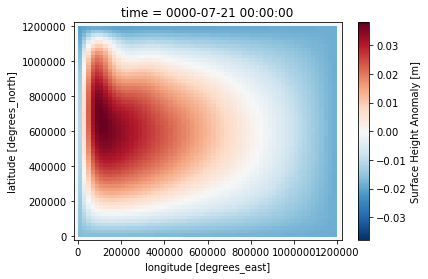

In [5]:
ds.Eta.isel(time=-1).plot()

In [6]:
import xgcm
metrics = {
    ('X',): ['dxC', 'dxG'],
    ('Y',): ['dyC', 'dyG'],
    ('Z',): ['drC', 'drF'],
    ('X', 'Y'): ['rA', 'rAz', 'rAs', 'rAw']
}

grid = xgcm.Grid(coords, metrics=metrics, periodic=True)
grid

<xgcm.Grid>
Y Axis (periodic):
  * center   YC --> left
  * left     YG --> center
Z Axis (periodic):
  * center   Z --> left
  * left     Zl --> center
  * outer    Zp1 --> center
  * right    Zu --> center
X Axis (periodic):
  * center   XC --> left
  * left     XG --> center
T Axis (periodic):
  * center   time

In [7]:
U_center = grid.interp(ds.U, 'X', boundary='fill')
V_center = grid.interp(ds.V, 'Y', boundary='fill')

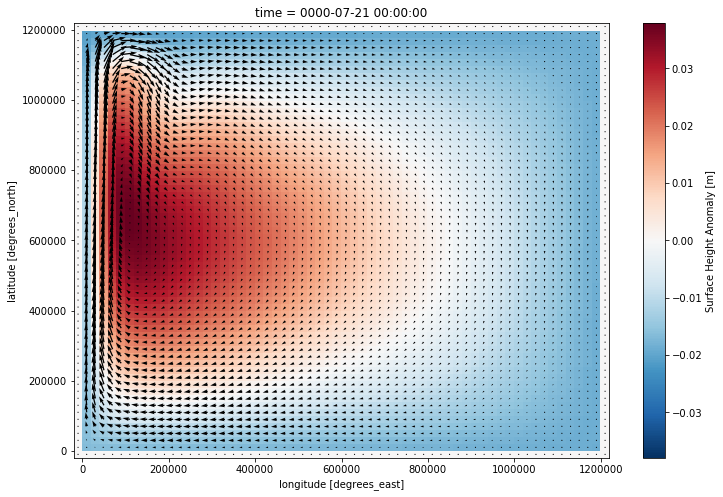

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))
ds.Eta[-1].plot(ax=ax)
ax.quiver(coords.XC, coords.YC, U_center[-1], V_center[-1])

$$
\psi = - \int_0^y dy' \int_{-H}^0 dz u(x,y',z,t)
$$

In [9]:
ψ = -grid.cumint(ds.U * coords.drF[0], 'Y', boundary='fill')/1e6
ψ

<xarray.DataArray 'concatenate-9875394b7b7661dd7779916ee132c790' (time: 200, YG: 62, XG: 62)>
dask.array<truediv, shape=(200, 62, 62), dtype=float32, chunksize=(1, 61, 62), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0000-01-02 00:00:00 ... 0000-07-21 00:00:00
  * YG       (YG) >f4 -20000.0 0.0 20000.0 ... 1160000.0 1180000.0 1200000.0
  * XG       (XG) >f4 -20000.0 0.0 20000.0 ... 1160000.0 1180000.0 1200000.0

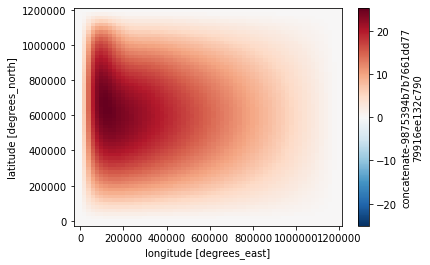

In [17]:
full_sol = ψ.mean(dim='time').plot()

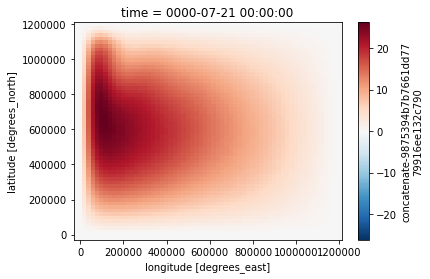

In [10]:
ψ[-1].plot()

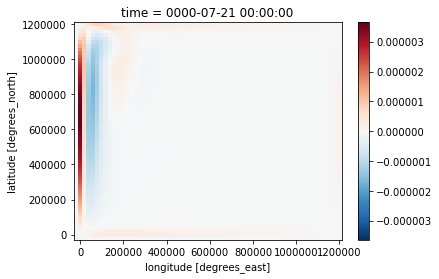

In [11]:
Γ = (grid.diff(ds.V * coords.dyC, 'X', boundary='extend') - 
     grid.diff(ds.U * coords.dxC, 'Y', boundary='extend')) 
#extend makes sure that derivative is smooth on the boundaries
ζ = Γ / coords.rAz
ζ[-1].plot()

In [12]:
#function to take the curl(var)
def curl(u, v):
    return(-grid.diff(u * coords.dxC, 'Y', boundary='extend') +
           grid.diff(v * coords.dyC, 'X', boundary='extend')) / ds.rAz

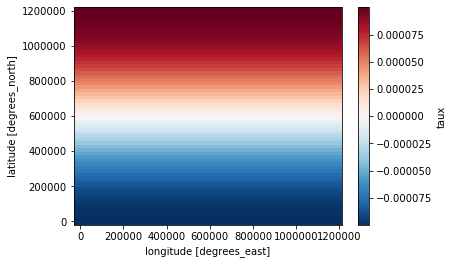

In [13]:
#read windstress
dtype = '>f4'
taux_data = np.fromfile(f'{rundir}/windx_cosy.bin', dtype=dtype)
taux_data.shape = coords.rA.shape
rho0 = 1000.
ds['taux'] = ('YC', 'XG'), taux_data / rho0
ds.taux.plot()

### Stommel's solution:
$$
\Psi = \frac{\tau_0 \pi}{\beta}(1 - \frac{x}{a} - e^{-\frac{x}{a\epsilon}})sin(\frac{\pi y}{a})
$$

In [14]:
tau_0 = 0.1 #N/m^2
beta = 1e-11 #(sm)^-1
r = 1e-6 #why is it to 1e-6??
a = coords.YG[-1].values
epsilon = r / (beta * a)
x = coords.XG
y = coords.YG

In [15]:
psi = ((tau_0*np.pi) / beta) * (1 - (x / a) - np.e**(- (x / (a*epsilon)))) * np.sin((np.pi*y) / a)
psi_2 = ((0.2*np.pi) / beta) * (1 - (x / a) - np.e**(- (x / (a*epsilon)))) * np.sin((np.pi*y) / a)

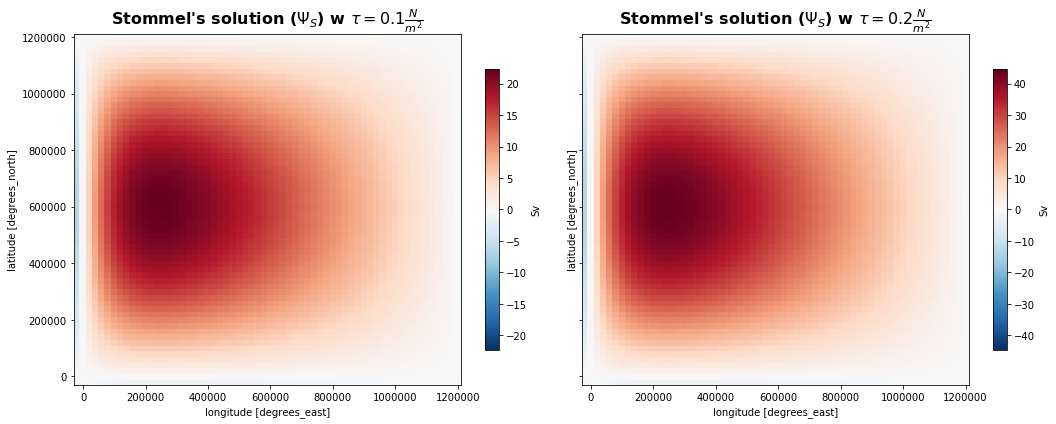

In [18]:
#Sv after dividing by rho0
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(15,6), sharey=True)

(psi/(rho0*1e6)).transpose().plot(cbar_kwargs={'shrink' : 0.8, 'label':'Sv'}, ax=ax0)
ax0.set_title(r"Stommel's solution ($\Psi_S$) w $\tau = 0.1 \frac{N}{m^2}$", fontsize=16, weight='bold')

(psi_2/(rho0*1e6)).transpose().plot(cbar_kwargs={'shrink' : 0.8, 'label':'Sv'}, ax=ax1)
ax1.set_title(r"Stommel's solution ($\Psi_S$) w $\tau = 0.2 \frac{N}{m^2}$", fontsize=16, weight='bold')
plt.tight_layout();

### Full solution:
$$
\psi = - \int_0^y dy' \int_{-H}^0 dz u(x,y',z,t)
$$

In [9]:
ψ = -grid.cumint(ds.U * coords.drF[0], 'Y', boundary='fill')/1e6
ψ

<xarray.DataArray 'concatenate-9875394b7b7661dd7779916ee132c790' (time: 200, YG: 62, XG: 62)>
dask.array<truediv, shape=(200, 62, 62), dtype=float32, chunksize=(1, 61, 62), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0000-01-02 00:00:00 ... 0000-07-21 00:00:00
  * YG       (YG) >f4 -20000.0 0.0 20000.0 ... 1160000.0 1180000.0 1200000.0
  * XG       (XG) >f4 -20000.0 0.0 20000.0 ... 1160000.0 1180000.0 1200000.0

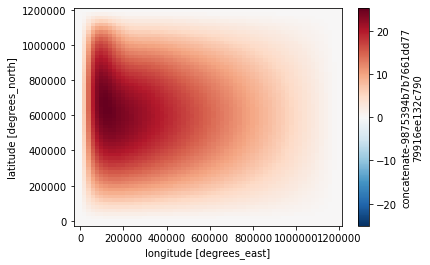

In [21]:
full_sol = ψ.mean(dim='time')
full_sol.plot()

In [22]:
full_sol

<xarray.DataArray 'concatenate-9875394b7b7661dd7779916ee132c790' (YG: 62, XG: 62)>
dask.array<mean_agg-aggregate, shape=(62, 62), dtype=float32, chunksize=(61, 62), chunktype=numpy.ndarray>
Coordinates:
  * YG       (YG) >f4 -20000.0 0.0 20000.0 ... 1160000.0 1180000.0 1200000.0
  * XG       (XG) >f4 -20000.0 0.0 20000.0 ... 1160000.0 1180000.0 1200000.0

In [23]:
psi

<xarray.DataArray (XG: 62, YG: 62)>
array([[ 3.3662358e+08, -0.0000000e+00, -3.3662358e+08, ...,
        -6.7232467e+08, -3.3662266e+08,  5.6230109e+02],
       [-0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00, -0.0000000e+00],
       [-2.7063670e+08,  0.0000000e+00,  2.7063670e+08, ...,
         5.4053178e+08,  2.7063597e+08, -4.5207565e+02],
       ...,
       [-5.4791060e+07,  0.0000000e+00,  5.4791060e+07, ...,
         1.0943197e+08,  5.4790908e+07, -9.1523811e+01],
       [-2.7390680e+07,  0.0000000e+00,  2.7390680e+07, ...,
         5.4706296e+07,  2.7390604e+07, -4.5753807e+01],
       [ 1.0102211e+04, -0.0000000e+00, -1.0102211e+04, ...,
        -2.0176736e+04, -1.0102183e+04,  1.6874885e-02]], dtype=float32)
Coordinates:
  * XG       (XG) >f4 -20000.0 0.0 20000.0 ... 1160000.0 1180000.0 1200000.0
  * YG       (YG) >f4 -20000.0 0.0 20000.0 ... 1160000.0 1180000.0 1200000.0

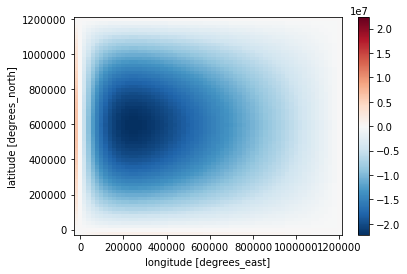

In [25]:
(full_sol - (psi/rho0)).plot()

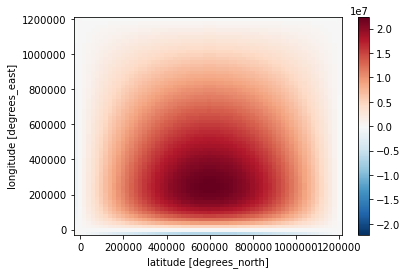

In [26]:
((psi/rho0) - full_sol).plot()